## **Importing Libraries**

In [77]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Importing dataset**

In [78]:
data=pd.read_csv("/kaggle/input/stock-market-historical-data-of-top-10-companies/data.csv")
data.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


## **Data Preprocessing**

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [80]:
data["Date"]=pd.to_datetime(data["Date"],format="mixed")

In [81]:
data["High"] = data["High"].replace({"\$":""}, regex=True).astype(float)
data["Low"] = data["Low"].replace({"\$":""}, regex=True).astype(float)
data["Close/Last"] = data["Close/Last"].replace({"\$":""}, regex=True).astype(float)
data["Open"] = data["Open"].replace({"\$":""}, regex=True).astype(float)

In [82]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

### Label Encoding

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Company"]=le.fit_transform(data["Company"])

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     25160 non-null  int64         
 1   Date        25160 non-null  datetime64[ns]
 2   Close/Last  25160 non-null  float64       
 3   Volume      25160 non-null  int64         
 4   Open        25160 non-null  float64       
 5   High        25160 non-null  float64       
 6   Low         25160 non-null  float64       
 7   Day         25160 non-null  int32         
 8   Month       25160 non-null  int32         
 9   Year        25160 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2)
memory usage: 1.6 MB


In [85]:
data.describe()

,Company,Date,Close/Last,Volume,Open,High,Low,Day,Month,Year
count,25160.000000,25160,25160.000000,2.516000e+04,25160.000000,25160.000000,25160.000000,25160.000000,25160.000000,25160.000000
mean,4.500000,2018-07-15 16:11:49.697933056,102.455878,5.131764e+07,102.430761,103.829305,101.006112,15.744833,6.548092,2018.035374
min,0.000000,2013-07-18 00:00:00,1.620000,1.143952e+06,1.620000,1.690000,1.610000,1.000000,1.000000,2013.000000
25%,2.000000,2016-01-14 18:00:00,36.567500,1.200394e+07,36.507500,36.890000,36.128000,8.000000,4.000000,2016.000000
50%,4.500000,2018-07-16 12:00:00,65.680000,2.672083e+07,65.650000,66.486900,64.915500,16.000000,7.000000,2018.000000
75%,7.000000,2021-01-13 06:00:00,134.235025,6.857269e+07,134.320000,136.233525,132.660000,23.000000,10.000000,2021.000000
max,9.000000,2023-07-17 00:00:00,691.690000,1.065209e+09,692.350000,700.989400,686.090000,31.000000,12.000000,2023.000000
std,2.872338,NaN,101.991372,6.399143e+07,101.996115,103.529523,100.399743,8.755554,3.426630,2.913342


In [86]:
data.head(5)

,Company,Date,Close/Last,Volume,Open,High,Low,Day,Month,Year
0,0,2023-07-17,193.99,50520160,191.90,194.3200,191.81,17,7,2023
1,0,2023-07-14,190.69,41616240,190.23,191.1799,189.63,14,7,2023
2,0,2023-07-13,190.54,41342340,190.50,191.1900,189.78,13,7,2023
3,0,2023-07-12,189.77,60750250,189.68,191.7000,188.47,12,7,2023
4,0,2023-07-11,188.08,46638120,189.16,189.3000,186.60,11,7,2023


## **Data analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


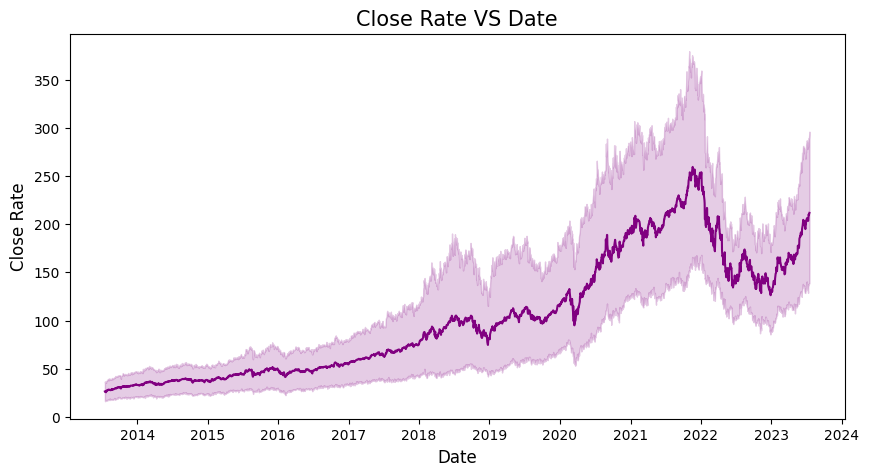

In [87]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Date",y="Close/Last",data=data,color="purple")
plt.title("Close Rate VS Date",fontsize=15)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Close Rate",fontsize=12)
plt.show()

<Axes: >

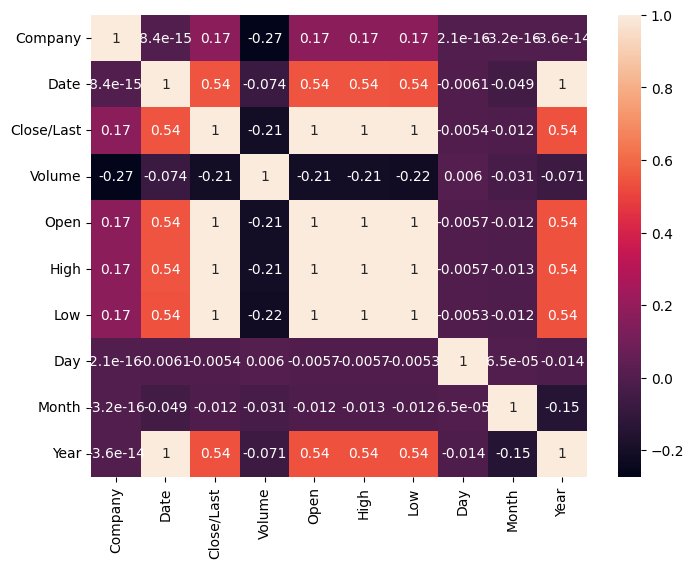

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

## **Model Training**
### Data splitting

In [89]:
x=data.drop(["Close/Last"],axis=1)
x=x.drop(["Date"],axis=1)
y=data["Close/Last"]

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### Fitting Data in model

In [91]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred=lr.predict(x_test)

## **Model Evaluuation**

In [93]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
print(acc*100)

99.9829548311459


## **Simulate Trading Over Time (180 days)**

In [94]:
data1=data.drop(["Date"],axis=1)

In [95]:
df=data1.head(180)
x1=df.drop(["Close/Last"],axis=1)
y1=df["Close/Last"]

### Initialize Portfolio

In [96]:
initial_capital = 10000  # Starting capital in dollars
shares_held = 0          # Initially no shares are held
cash = initial_capital    # Initial cash available
portfolio_value = cash    # Portfolio value at the beginning


### Implement the Trading Strategy

In [97]:
for i in range(1, len(df)):  # Start from day 1 to len(data)
    # Actual and predicted prices
    actual_close_today = df["Close/Last"][i-1]
    predicted_close_tomorrow = lr.predict(x1)[0]
    
    # Buy if predicted price is higher than today's actual close
    if predicted_close_tomorrow > actual_close_today and cash > actual_close_today:
        # Calculate how many shares can be bought
        shares_to_buy = cash // actual_close_today
        # Update the number of shares held and cash available
        shares_held += shares_to_buy
        cash -= shares_to_buy * actual_close_today
        print(f"Day {i}: Bought {shares_to_buy} shares at {actual_close_today:.2f}, cash left: {cash:.2f}")
    
    # Sell if predicted price is lower than today's actual close
    elif predicted_close_tomorrow < actual_close_today and shares_held > 0:
        # Sell all shares
        cash += shares_held * actual_close_today
        print(f"Day {i}: Sold {shares_held} shares at {actual_close_today:.2f}, cash now: {cash:.2f}")
        shares_held = 0

# Final portfolio value at the end of the simulation
final_portfolio_value = cash + shares_held * df['Close/Last'].iloc[-1]
print(f"Final Portfolio Value: {final_portfolio_value:.2f}")


Day 2: Bought 52.0 shares at 190.69, cash left: 84.12
Day 11: Sold 52.0 shares at 193.97, cash now: 10170.56
Day 12: Bought 53.0 shares at 189.59, cash left: 122.29
Final Portfolio Value: 8037.84


## **Generate Buy/Sell Signals**

### Generate Predicted Closing Prices

In [98]:
data['Predicted_Close'] = lr.predict(x)

### Generate buy/sell signals based on predicted closing prices

In [99]:

def generate_signals(data):
    """
    Generate buy/sell signals based on predicted and actual closing prices.
    A buy signal is generated if tomorrow's predicted price is higher than today's actual close.
    A sell signal is generated if tomorrow's predicted price is lower than today's actual close.
    """
    # Create a column for the signal (1 = buy, -1 = sell, 0 = hold)
    data['Signal'] = np.where(data['Predicted_Close'].shift(-1) > data['Close/Last'], 'Buy', 
                              np.where(data['Predicted_Close'].shift(-1) < data['Close/Last'], 'Sell', 'Hold'))
    return data

# Step 3: Call the function to generate buy/sell signals
data_with_signals = generate_signals(data)

# Display the resulting data with signals
print(data_with_signals[['Date', 'Close/Last', 'Predicted_Close', 'Signal']])


            Date  Close/Last  Predicted_Close Signal
0     2023-07-17    193.9900       193.925598   Sell
1     2023-07-14    190.6900       190.741688    Buy
2     2023-07-13    190.5400       190.721165   Sell
3     2023-07-12    189.7700       190.473217   Sell
4     2023-07-11    188.0800       187.427502    Buy
...          ...         ...              ...    ...
25155 2013-07-24     34.4714        34.849929    Buy
25156 2013-07-23     35.7514        36.510407    Buy
25157 2013-07-22     37.4228        37.219848    Buy
25158 2013-07-19     37.7966        37.802799    Buy
25159 2013-07-18     38.0586        37.914640   Hold

[25160 rows x 4 columns]
